In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os dados
##### Carregando o dataset.csv, e usando funções como: 'shape', 'columns', 'head' e 'tail'

In [23]:
df = pd.read_csv('dataset.csv')

In [24]:
df.shape

(365, 2)

In [25]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [26]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [27]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-processamento dos dados
##### Mudando a coluna 'Data' de str para datatime, e a convertendo no índice, transformando o dataframe para series. Além de sinalizar a frequência diária

In [28]:
df['Data'].min()

'2023-01-01'

In [29]:
df['Data'].max()

'2023-12-31'

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [31]:
df['Data'] = pd.to_datetime(df['Data'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [33]:
dataseries = df.set_index('Data')['Total_Vendas']

In [34]:
type(dataseries)

pandas.core.series.Series

In [35]:
dataseries

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [36]:
dataseries = dataseries.asfreq('D')

In [39]:
dataseries

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise exploratória
##### Montando o gráfico da série temporal de vendas (com e sem formatação)

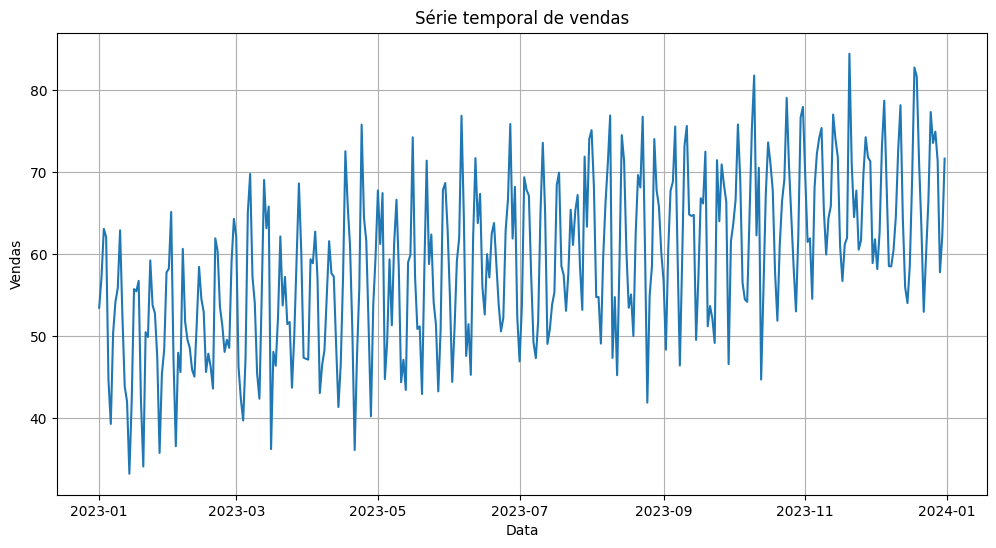

In [40]:
plt.figure(figsize=(12,6))
plt.plot(dataseries)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série temporal de vendas')
plt.grid(True)

plt.show()

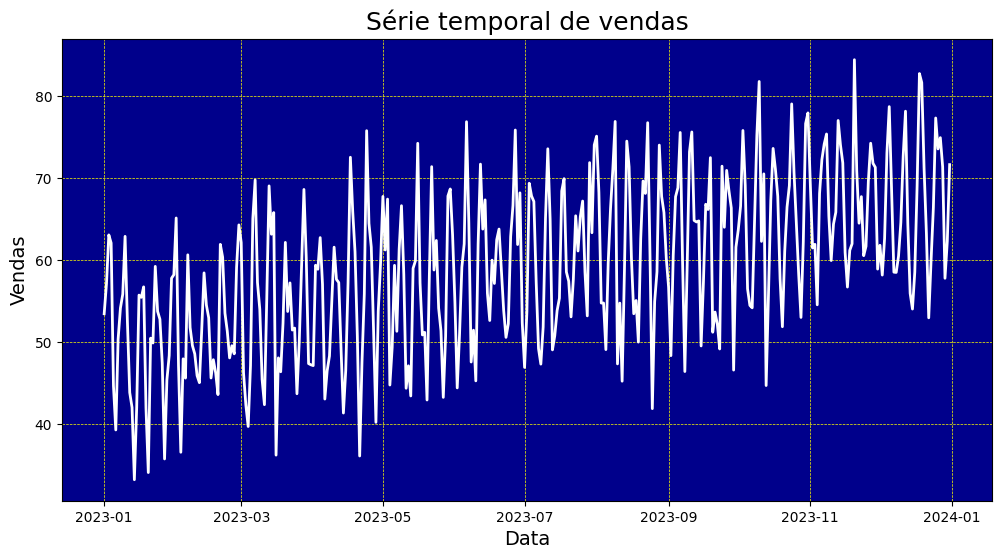

In [51]:
# Criando um layout de contraste
plt.figure(figsize=(12,6))
plt.plot(dataseries, color = 'white', linewidth = 2)

# Configurando as cores e estilo do gráfico
plt.gca().set_facecolor('darkblue')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'k', fontsize = 14)
plt.ylabel('Vendas', color = 'k', fontsize = 14)
plt.title('Série temporal de vendas', color = 'k', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors = 'k')
plt.tick_params(axis = 'y', colors = 'k')

plt.show()

## Suavização exponencial
##### Suposições: composta de uma média e um ruído, a média diminui sua influencia conforme o tempo passado, o erro aleatória geralmente tem média 0 e variância constante, o parametro de suavisação é uma constante entre 0 e 1 (0 aos mais antigos e 1 aos mais recentes)

In [55]:
# Cria o modelo
model = SimpleExpSmoothing(dataseries)

# Ajuste ou treino do modelo
tmodel = model.fit(smoothing_level=0.2)

# Extrai os valores previstos do modelo
expsmoothing = tmodel.fittedvalues

C:\Users\Igora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


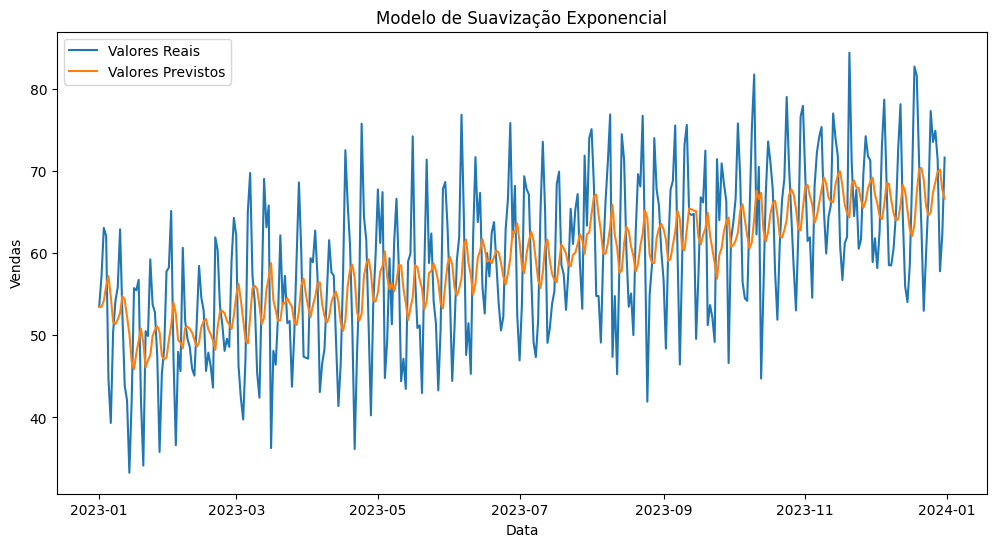

In [56]:
# Plot

plt.figure(figsize = (12, 6))
plt.plot(dataseries, label = 'Valores Reais')
plt.plot(expsmoothing, label = 'Valores Previstos')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## Forecast

In [57]:
prevision = tmodel.forecast(steps = 1)

In [58]:
print('Previsão do total de vendas para janeiro de 2024:', round(prevision[0], 4))

Previsão do total de vendas para janeiro de 2024: 67.6499


C:\Users\Igora\AppData\Local\Temp\ipykernel_11832\3180352071.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Previsão do total de vendas para janeiro de 2024:', round(prevision[0], 4))
